# Problem Statement 
Parkinson's disease is a progressive nervous system disorder that affects movement leading to shaking, stiffness, and difficulty with walking, balance, and coordination. Parkinson's symptoms usually being gradually and get worse over time. 

## Workflow 
1. Parkinson's Data 
2. Data pre-processing 
3. Train Test Split 
4. Traing Data - Support Vector Classifier 
5. Evaluating the Model 

- New Data - Trained Support Vector Machine Classifier - Parkinson's or Healthy(Prediction)

In [69]:
# data analysis 
import pandas as pd 
import numpy as np 
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
# set options 
sns.set_style('whitegrid')
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
%matplotlib inline 
# machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Dataset Information
- Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
- measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [70]:
# import data 
df = pd.read_csv('../data/parkinsons.csv')
df.head() 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.008,7.000e-05,0.004,0.006,0.011,0.044,...,0.065,0.022,21.033,1,0.415,0.815,-4.813,0.266,2.301,0.285
1,phon_R01_S01_2,122.400,148.650,113.819,0.010,8.000e-05,0.005,0.007,0.014,0.061,...,0.094,0.019,19.085,1,0.458,0.820,-4.075,0.336,2.487,0.369
2,phon_R01_S01_3,116.682,131.111,111.555,0.011,9.000e-05,0.005,0.008,0.016,0.052,...,0.083,0.013,20.651,1,0.430,0.825,-4.443,0.311,2.342,0.333
3,phon_R01_S01_4,116.676,137.871,111.366,0.010,9.000e-05,0.005,0.007,0.015,0.055,...,0.088,0.014,20.644,1,0.435,0.819,-4.118,0.334,2.406,0.369
4,phon_R01_S01_5,116.014,141.781,110.655,0.013,1.100e-04,0.007,0.009,0.020,0.064,...,0.105,0.018,19.649,1,0.417,0.823,-3.748,0.235,2.332,0.410


In [71]:
# check shape of data 
df.shape

(195, 24)

In [72]:
# dtypes 
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [73]:
# check missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [74]:
# summary stats 
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000,195.000,195.000,195.000,1.950e+02,1.950e+02,1.950e+02,195.000,195.000,195.000,...,195.000,1.950e+02,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000
mean,154.229,197.105,116.325,0.006,4.396e-05,3.306e-03,3.446e-03,0.010,0.030,0.282,...,0.047,2.485e-02,21.886,0.754,0.499,0.718,-5.684,0.227,2.382,0.207
std,41.390,91.492,43.521,0.005,3.482e-05,2.968e-03,2.759e-03,0.009,0.019,0.195,...,0.030,4.042e-02,4.426,0.432,0.104,0.055,1.090,0.083,0.383,0.090
min,88.333,102.145,65.476,0.002,7.000e-06,6.800e-04,9.200e-04,0.002,0.010,0.085,...,0.014,6.500e-04,8.441,0.000,0.257,0.574,-7.965,0.006,1.423,0.045
25%,117.572,134.863,84.291,0.003,2.000e-05,1.660e-03,1.860e-03,0.005,0.017,0.148,...,0.025,5.925e-03,19.198,1.000,0.421,0.675,-6.450,0.174,2.099,0.137
50%,148.790,175.829,104.315,0.005,3.000e-05,2.500e-03,2.690e-03,0.007,0.023,0.221,...,0.038,1.166e-02,22.085,1.000,0.496,0.722,-5.721,0.219,2.362,0.194
75%,182.769,224.206,140.019,0.007,6.000e-05,3.835e-03,3.955e-03,0.012,0.038,0.350,...,0.061,2.564e-02,25.075,1.000,0.588,0.762,-5.046,0.279,2.636,0.253
max,260.105,592.030,239.170,0.033,2.600e-04,2.144e-02,1.958e-02,0.064,0.119,1.302,...,0.169,3.148e-01,33.047,1.000,0.685,0.825,-2.434,0.450,3.671,0.527


In [75]:
# transpose summary stats 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,1.542e+02,4.139e+01,8.833e+01,1.176e+02,1.488e+02,1.828e+02,2.601e+02
MDVP:Fhi(Hz),195.0,1.971e+02,9.149e+01,1.021e+02,1.349e+02,1.758e+02,2.242e+02,5.920e+02
MDVP:Flo(Hz),195.0,1.163e+02,4.352e+01,6.548e+01,8.429e+01,1.043e+02,1.400e+02,2.392e+02
MDVP:Jitter(%),195.0,6.220e-03,4.848e-03,1.680e-03,3.460e-03,4.940e-03,7.365e-03,3.316e-02
MDVP:Jitter(Abs),195.0,4.396e-05,3.482e-05,7.000e-06,2.000e-05,3.000e-05,6.000e-05,2.600e-04
MDVP:RAP,195.0,3.306e-03,2.968e-03,6.800e-04,1.660e-03,2.500e-03,3.835e-03,2.144e-02
MDVP:PPQ,195.0,3.446e-03,2.759e-03,9.200e-04,1.860e-03,2.690e-03,3.955e-03,1.958e-02
Jitter:DDP,195.0,9.920e-03,8.903e-03,2.040e-03,4.985e-03,7.490e-03,1.151e-02,6.433e-02
MDVP:Shimmer,195.0,2.971e-02,1.886e-02,9.540e-03,1.650e-02,2.297e-02,3.789e-02,1.191e-01
MDVP:Shimmer(dB),195.0,2.823e-01,1.949e-01,8.500e-02,1.485e-01,2.210e-01,3.500e-01,1.302e+00


In [76]:
# class distribution 
df['status'].value_counts() 

1    147
0     48
Name: status, dtype: int64

__Comment__
- 1 Parkinson's positive 
- 0 Parkinson's negative 

In [77]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.938,223.637,145.207,0.004,2.337e-05,0.002,0.002,0.006,0.018,0.163,...,0.013,0.029,0.011,24.679,0.443,0.696,-6.759,0.160,2.154,0.123
1,145.181,188.441,106.894,0.007,5.068e-05,0.004,0.004,0.011,0.034,0.321,...,0.028,0.053,0.029,20.974,0.517,0.725,-5.333,0.248,2.456,0.234


In [78]:
# correlation: Pearson’s by default 
df.corr(method='pearson')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000,0.401,0.597,-0.118,-0.382,-0.076,-0.112,-0.076,-0.098,-0.074,...,-0.095,-0.022,0.059,-0.384,-0.384,-0.446,-0.414,-0.249,0.178,-0.372
MDVP:Fhi(Hz),0.401,1.000,0.085,0.102,-0.029,0.097,0.091,0.097,0.002,0.043,...,-0.004,0.164,-0.025,-0.166,-0.112,-0.343,-0.077,-0.003,0.176,-0.070
MDVP:Flo(Hz),0.597,0.085,1.000,-0.140,-0.278,-0.101,-0.096,-0.100,-0.145,-0.119,...,-0.151,-0.109,0.211,-0.380,-0.400,-0.050,-0.395,-0.244,-0.101,-0.340
MDVP:Jitter(%),-0.118,0.102,-0.140,1.000,0.936,0.990,0.974,0.990,0.769,0.804,...,0.747,0.907,-0.728,0.278,0.361,0.099,0.694,0.385,0.433,0.722
MDVP:Jitter(Abs),-0.382,-0.029,-0.278,0.936,1.000,0.923,0.898,0.923,0.703,0.717,...,0.697,0.835,-0.657,0.339,0.442,0.175,0.736,0.389,0.311,0.748
MDVP:RAP,-0.076,0.097,-0.101,0.990,0.923,1.000,0.957,1.000,0.760,0.791,...,0.745,0.920,-0.722,0.267,0.342,0.064,0.648,0.324,0.427,0.671
MDVP:PPQ,-0.112,0.091,-0.096,0.974,0.898,0.957,1.000,0.957,0.798,0.839,...,0.764,0.845,-0.732,0.289,0.333,0.196,0.716,0.408,0.413,0.770
Jitter:DDP,-0.076,0.097,-0.100,0.990,0.923,1.000,0.957,1.000,0.760,0.791,...,0.745,0.920,-0.721,0.267,0.342,0.064,0.648,0.324,0.427,0.671
MDVP:Shimmer,-0.098,0.002,-0.145,0.769,0.703,0.760,0.798,0.760,1.000,0.987,...,0.988,0.722,-0.835,0.367,0.447,0.160,0.655,0.452,0.507,0.694
MDVP:Shimmer(dB),-0.074,0.043,-0.119,0.804,0.717,0.791,0.839,0.791,0.987,1.000,...,0.963,0.744,-0.828,0.351,0.411,0.165,0.653,0.454,0.512,0.695


In [79]:
# skew 
df.skew(numeric_only=True)

MDVP:Fo(Hz)         0.592
MDVP:Fhi(Hz)        2.542
MDVP:Flo(Hz)        1.217
MDVP:Jitter(%)      3.085
MDVP:Jitter(Abs)    2.649
MDVP:RAP            3.361
MDVP:PPQ            3.074
Jitter:DDP          3.362
MDVP:Shimmer        1.666
MDVP:Shimmer(dB)    1.999
Shimmer:APQ3        1.581
Shimmer:APQ5        1.799
MDVP:APQ            2.618
Shimmer:DDA         1.581
NHR                 4.221
HNR                -0.514
status             -1.188
RPDE               -0.143
DFA                -0.033
spread1             0.432
spread2             0.144
D2                  0.430
PPE                 0.797
dtype: float64

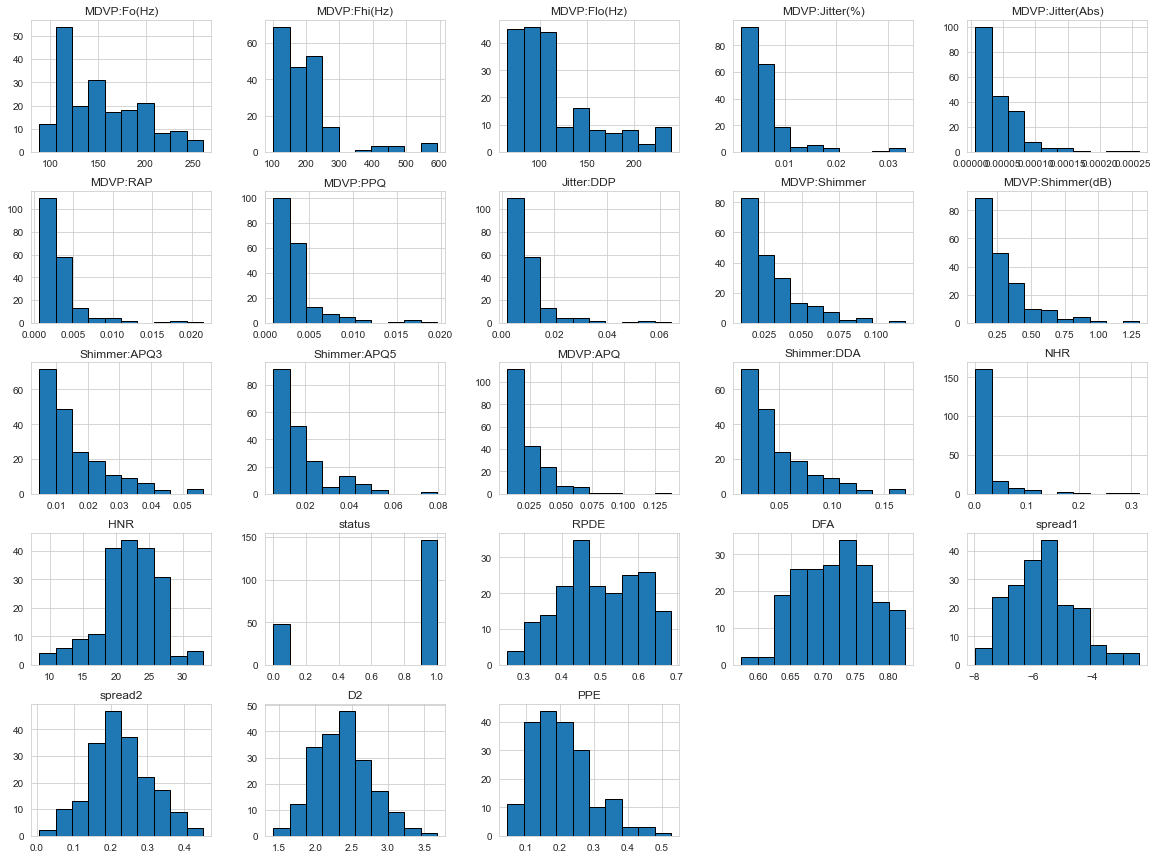

In [80]:
df.hist(figsize=(20,15), edgecolor='black')
plt.show() 

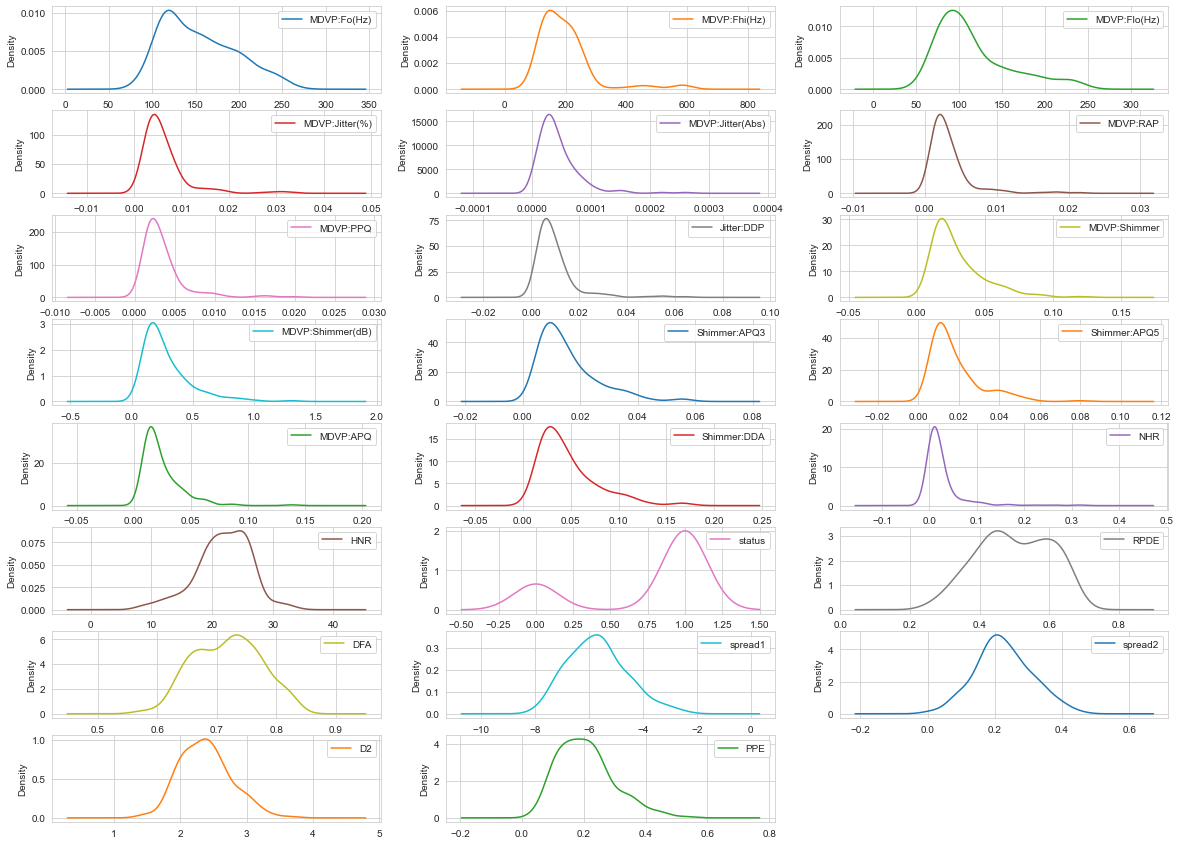

In [21]:
df.plot(kind='density', subplots=True, sharex=False, figsize=(20,15), layout=(8,3))
plt.show() 

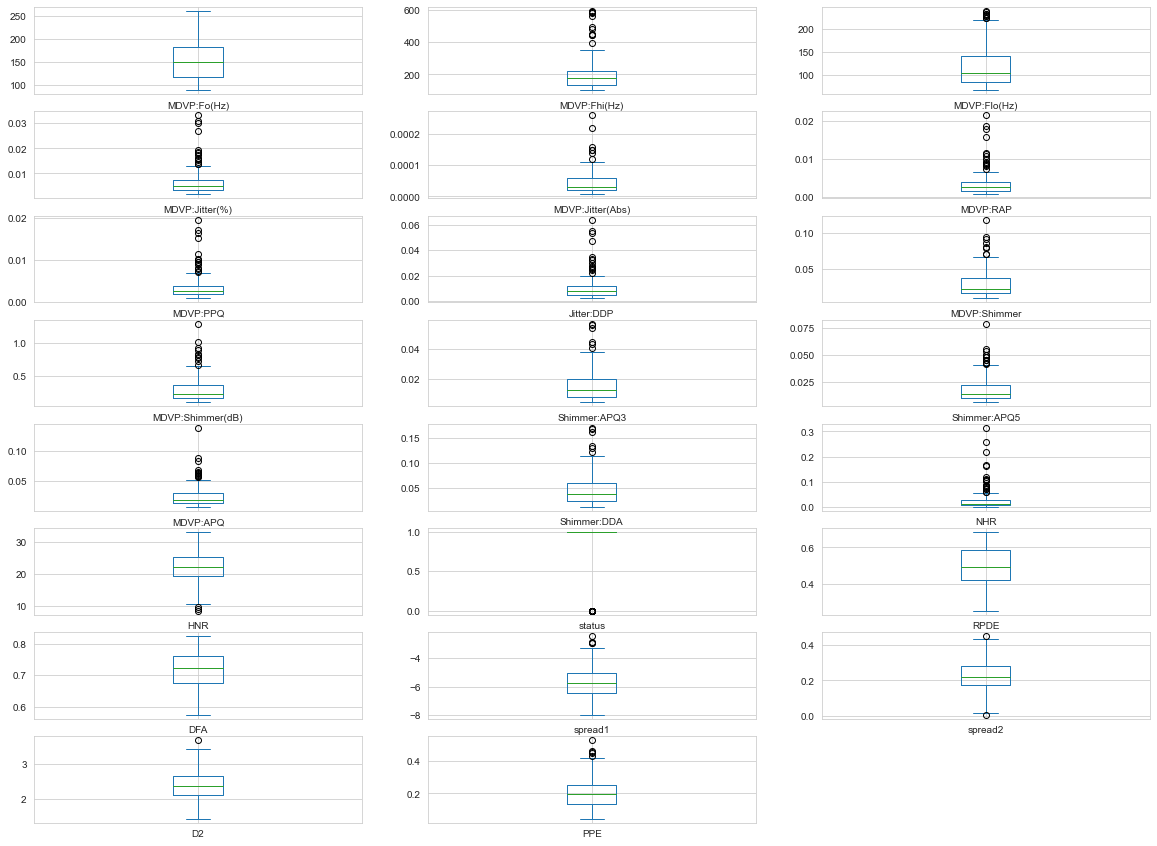

In [81]:
df.plot(kind='box', subplots=True, sharex=False, figsize=(20,15), layout=(8,3))
plt.show() 

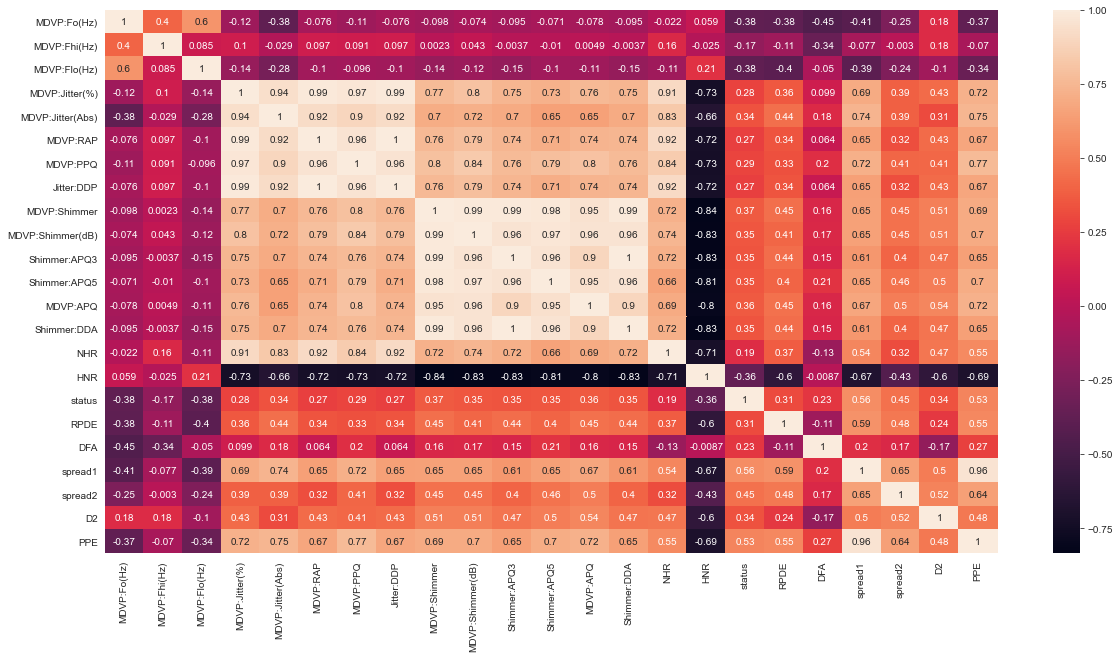

In [82]:
plt.figure(figsize=(20,10))
corr = df.corr() 
sns.heatmap(corr, annot=True)
plt.show()

In [84]:
X = df.drop(columns=['name', 'status'], axis=1)
y = df['status']

In [85]:
X.head() 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.008,7.000e-05,0.004,0.006,0.011,0.044,0.426,...,0.030,0.065,0.022,21.033,0.415,0.815,-4.813,0.266,2.301,0.285
1,122.400,148.650,113.819,0.010,8.000e-05,0.005,0.007,0.014,0.061,0.626,...,0.044,0.094,0.019,19.085,0.458,0.820,-4.075,0.336,2.487,0.369
2,116.682,131.111,111.555,0.011,9.000e-05,0.005,0.008,0.016,0.052,0.482,...,0.036,0.083,0.013,20.651,0.430,0.825,-4.443,0.311,2.342,0.333
3,116.676,137.871,111.366,0.010,9.000e-05,0.005,0.007,0.015,0.055,0.517,...,0.038,0.088,0.014,20.644,0.435,0.819,-4.118,0.334,2.406,0.369
4,116.014,141.781,110.655,0.013,1.100e-04,0.007,0.009,0.020,0.064,0.584,...,0.045,0.105,0.018,19.649,0.417,0.823,-3.748,0.235,2.332,0.410


In [86]:
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((156, 22), (39, 22), (156,), (39,))

In [89]:
# Standardization
scaler = StandardScaler() 
scaler.fit(X_train)

StandardScaler()

In [90]:
X_train = scaler.transform(X_train)


In [91]:
X_test = scaler.transform(X_test)

In [92]:
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [94]:
model = SVC(kernel='linear')
# training model with training data 
model.fit(X_train, y_train)

SVC(kernel='linear')

In [95]:
# evaluation 
X_train_pred = model.predict(X_train)
X_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1])

In [98]:
# evaluation 
training_accuracy_score = accuracy_score(y_train, X_train_pred)
training_accuracy_score

0.8846153846153846

In [101]:
X_test_pred = model.predict(X_test)
test_accuracy_score = accuracy_score(y_test, X_test_pred)
test_accuracy_score

0.8717948717948718

In [102]:
# Predictive System 
input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)

if prediction[0] == 0:
    print("The Person does not have Perkinson's")
else: 
    print("The Person has Perkinson's")

print(prediction)

The Person has Perkinson's
[1]
